**Simple Linear Regression**

Delivery_time -> Predict delivery time using sorting time

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#importing data
df= pd.read_csv("/content/delivery_time.csv")

In [ ]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA AND DATA VISUALISATION

In [ ]:
df.shape

(21, 2)

In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [ ]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.duplicated().sum()

0

In [ ]:
# change columns names
df.columns=("Delivery_time","Sorting_time")
df.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


**VISUALIZATIONS**

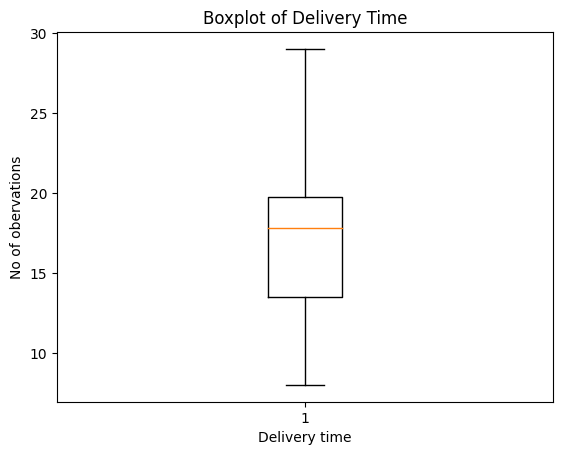

In [ ]:
plt.boxplot(df.Delivery_time)
plt.xlabel("Delivery time")
plt.ylabel("No of obervations")
plt.title("Boxplot of Delivery Time")
plt.show()

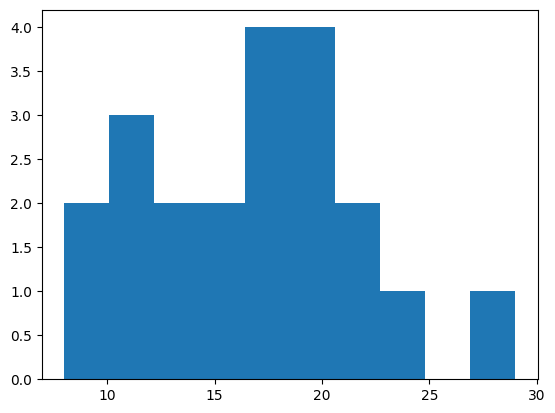

In [ ]:
plt.hist(df.Delivery_time)
plt.show()

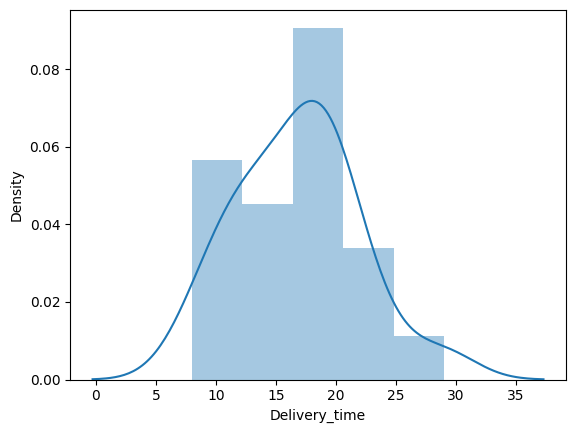

In [ ]:
sns.distplot(df['Delivery_time'])
plt.show()


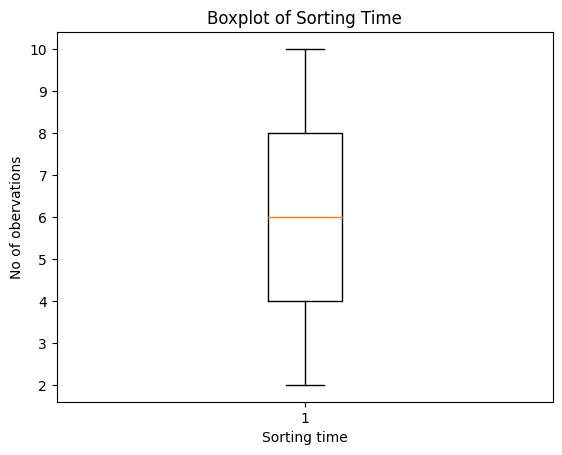

In [ ]:
plt.boxplot(df.Sorting_time)
plt.xlabel("Sorting time")
plt.ylabel("No of obervations")
plt.title("Boxplot of Sorting Time")
plt.show()

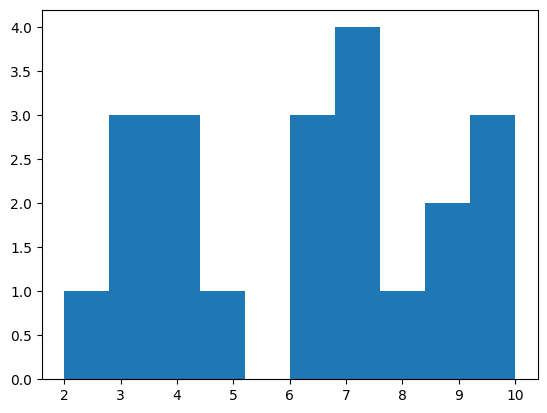

In [ ]:
plt.hist(df.Sorting_time)
plt.show()

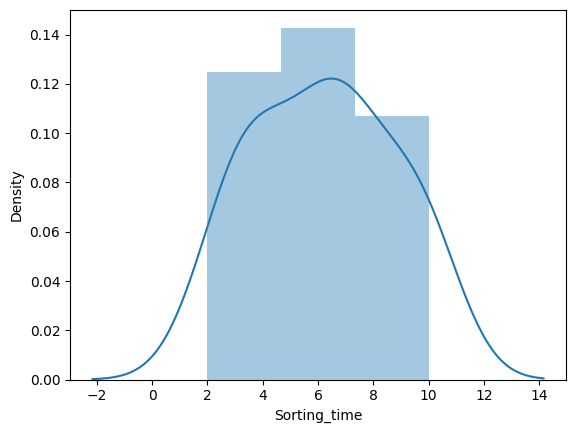

In [ ]:
sns.distplot(df['Sorting_time'])
plt.show()

[]

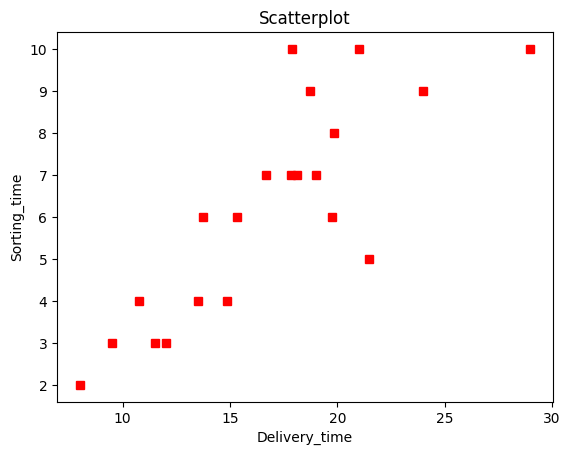

In [ ]:
plt.plot(df.Delivery_time,df.Sorting_time,"rs")
plt.xlabel("Delivery_time")
plt.ylabel("Sorting_time")
plt.title("Scatterplot")
plt.plot()

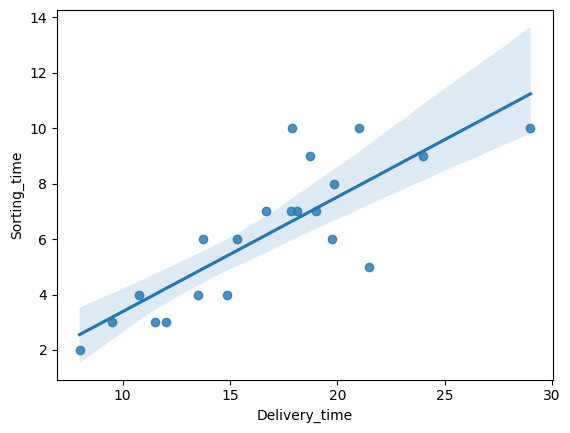

In [ ]:
sns.regplot(x="Delivery_time", y="Sorting_time", data=df);

**CORRELATION ANALYSIS**

In [ ]:
df.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


MODEL BUILDING AND TESTING

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_time~Sorting_time",data=df).fit()
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

from above it is inferred that

intercept = βo = 6.582734  
 β1 = 1.649020  
therefore equation  
y(Sorting_time)= β1(x)+βo
y=1.65x+6.58

In [ ]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        04:29:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R2 value is 0.682 means accuracy is 68.2%

In [ ]:
pred = model.predict(df)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [ ]:
rmse_lin = np.sqrt(np.mean(np.array(df['Delivery_time'])-np.array(pred))**2)
rmse_lin

6.259543148362787e-15

In [ ]:
model2 = smf.ols("np.cbrt(Delivery_time)~np.cbrt(Sorting_time)",data=df).fit()
model2.params

Intercept                1.013571
np.cbrt(Sorting_time)    0.845585
dtype: float64

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Wed, 13 Sep 2023   Prob (F-statistic):           4.90e-07
Time:                            04:29:32   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R2 value is 0.744 means the accuracy is 74.4%

In [ ]:
pred2 = model2.predict(df)

In [ ]:
pred2

0     2.835329
1     2.355854
2     2.550101
3     2.772459
4     2.835329
5     2.550101
6     2.631117
7     2.233116
8     2.835329
9     2.772459
10    2.704741
11    2.355854
12    2.631117
13    2.233116
14    2.233116
15    2.355854
16    2.550101
17    2.631117
18    2.078941
19    2.631117
20    2.459501
dtype: float64

In [ ]:
model2.resid

0    -0.076404
1     0.025248
2     0.152959
3     0.112041
4     0.236988
5    -0.064854
6     0.037285
7    -0.115204
8    -0.219449
9    -0.115812
10    0.001964
11   -0.148851
12   -0.076071
13    0.024063
14    0.058219
15    0.103764
16   -0.154391
17   -0.005048
18   -0.078941
19   -0.018652
20    0.321148
dtype: float64

In [ ]:
model2.resid_pearson

array([-0.55873422,  0.184635  ,  1.11856824,  0.81933613,  1.7330607 ,
       -0.47427135,  0.27265806, -0.84246939, -1.60480169, -0.8469177 ,
        0.01436188, -1.08852641, -0.55629712,  0.17596941,  0.42574754,
        0.75881341, -1.12903884, -0.0369137 , -0.57728755, -0.13639999,
        2.34850758])

In [ ]:
rmse_lin = np.sqrt(np.mean(np.array(df['Delivery_time'])-np.array(pred2))**2)
rmse_lin

14.255915978274071

In [ ]:
model3 = smf.ols("np.log(Delivery_time)~np.log(Sorting_time)",data=df).fit()
model3.params

Intercept               1.741987
np.log(Sorting_time)    0.597522
dtype: float64

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 13 Sep 2023   Prob (F-statistic):           1.60e-07
Time:                           04:29:33   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R square value is 0.772 so accuracy is 77.2%

In [ ]:
pred3 = model3.predict(df)
pred3

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [ ]:
model3.resid

0    -0.073311
1     0.032361
2     0.170550
3     0.123176
4     0.249463
5    -0.081488
6     0.039727
7    -0.147141
8    -0.233032
9    -0.123684
10    0.002696
11   -0.195423
12   -0.090501
13    0.043915
14    0.088971
15    0.129689
16   -0.191565
17   -0.008248
18   -0.076716
19   -0.023829
20    0.364391
dtype: float64

In [ ]:
rmse_lin=np.sqrt(np.mean(np.array(df['Delivery_time']-np.array(pred3))**2))
rmse_lin

14.791938693055753

In [ ]:
model4 = smf.ols("np.sqrt(Delivery_time)~np.sqrt(Sorting_time)",data=df).fit()
model4.params

Intercept                1.613479
np.sqrt(Sorting_time)    1.002217
dtype: float64

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 13 Sep 2023   Prob (F-statistic):           8.48e-07
Time:                            04:30:20   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R2 is 0.729 so the accuracy is 72.9%

In [ ]:
pred4 = model4.predict(df)
pred4

0     4.782767
1     3.617912
2     4.068399
3     4.620129
4     4.782767
5     4.068399
6     4.265095
7     3.349369
8     4.782767
9     4.620129
10    4.448176
11    3.617912
12    4.265095
13    3.349369
14    3.349369
15    3.617912
16    4.068399
17    4.265095
18    3.030827
19    4.265095
20    3.854504
dtype: float64

In [ ]:
model4.resid

0    -0.200191
1     0.056322
2     0.375699
3     0.278850
4     0.602398
5    -0.150491
6     0.093804
7    -0.267162
8    -0.551928
9    -0.290002
10    0.004913
11   -0.339193
12   -0.180980
13    0.041796
14    0.119060
15    0.239548
16   -0.360299
17   -0.009511
18   -0.202400
19   -0.042537
20    0.782305
dtype: float64

In [ ]:
rmse_lin=np.sqrt(np.mean(np.array(df['Delivery_time']-np.array(pred4))**2))
rmse_lin

13.51939241499564

PREDICTION

In [ ]:
# for better prediction model3(by log transformation) is suitable because of high
#rsquared value  & low rmse value compare to other models
df1=pd.Series([4,10])
df1

0     4
1    10
dtype: int64

In [ ]:
df1_pred=pd.DataFrame(df1,columns=['Sorting_time'])
df1_pred

,Sorting_time
0,4
1,10


In [ ]:
model3.predict(df1_pred)

0    2.570329
1    3.117833
dtype: float64